In [74]:
import pandas as pd
import numpy as np
import re
import string
from unidecode import unidecode
import nltk
import os


# Aqui os .txt estao dentro da pasta loop
files = os.listdir('loop') # mudar para o diretorio que tenha todos os .txt dos tweets
lista_pandas = list()
regex = re.compile(r'(?<=tweets_)[a-zA-Z\s]{2,}')

for file in files:
    d = pd.read_csv(os.path.join('loop',file), sep="\t")
    d['tag'] = regex.search(file).group()
    lista_pandas.append(d)
    print(file)

data = pd.concat(lista_pandas)
data.reset_index(drop=True, inplace=True)
print(data.shape)
# se gerar erro, abrir o .txt no notepad e salvar em UTF-8

tweets_banco do brasil_2018_11_04.txt
tweets_banco do brasil_2018_13_04.txt
tweets_banco do brasil_2018_14_04+.txt
tweets_banco do brasil_2018_14_04.txt
tweets_banco do brasil_2018_15_04.txt
tweets_banco do brasil_2018_16_04.txt
tweets_BancoInter_2018_11_04.txt
tweets_BancoInter_2018_13_04.txt
tweets_BancoInter_2018_14_04+.txt
tweets_BancoInter_2018_14_04.txt
tweets_BancoInter_2018_15_04.txt
tweets_BancoInter_2018_16_04.txt
tweets_bradesco_2018_11_04.txt
tweets_bradesco_2018_12_04.txt
tweets_bradesco_2018_14_04+.txt
tweets_bradesco_2018_14_04.txt
tweets_bradesco_2018_15_04.txt
tweets_bradesco_2018_16_04.txt
tweets_itau_2018_11_04.txt
tweets_itau_2018_12_04.txt
tweets_itau_2018_14_04+.txt
tweets_itau_2018_14_04.txt
tweets_itau_2018_15_04+.txt
tweets_itau_2018_15_04.txt
tweets_itau_2018_16_04.txt
tweets_nubank_2018_14_04.txt
tweets_nubank_2018_15_04.txt
tweets_nubank_2018_16_04.txt
tweets_santander_2018_11_04.txt
tweets_santander_2018_13_04.txt
tweets_santander_2018_14_04+.txt
tweets_san

In [75]:
data.head(10)

,Unnamed: 0,data,usuario,conteudo,retweets,favoritos,local,seguidores,amigos,tag
0,984258197073596416,2018-04-12 02:33:35,merespeita,@MrPoladoful nossa men se quer saber vendo la ...,0.0,0.0,NaN,0.0,70.0,banco do brasil
1,984257326763986944,2018-04-12 02:30:07,Desidrogenase,@DivagoTM Na verdade a piada aí é que alguém c...,0.0,1.0,NaN,118.0,343.0,banco do brasil
2,984256477929050112,2018-04-12 02:26:45,Diego Souza CRF,"Guerra, Moisés e William eram opções de banco ...",0.0,4.0,NaN,3156.0,619.0,banco do brasil
3,984256454004797440,2018-04-12 02:26:39,Revista CanaOnline,"A 5ª edição do Agroencontro, organizado de 10 ...",0.0,0.0,NaN,527.0,16.0,banco do brasil
4,984255454862807040,2018-04-12 02:22:41,cecilia,@GustavoCubas28 eu consigo pelo meu do banco d...,0.0,0.0,NaN,151.0,196.0,banco do brasil
5,984255381772881920,2018-04-12 02:22:24,Tainazinha,O banco do Brasil ficou todo destruído https:/...,0.0,0.0,NaN,1067.0,1662.0,banco do brasil
6,984255089039872000,2018-04-12 02:21:14,L. A.Vieira,RT @marisascruz: Partidos que ODEIAM o Brasil ...,66.0,0.0,NaN,228.0,83.0,banco do brasil
7,984254286363283456,2018-04-12 02:18:03,sorvete?,RT @wheewoon: aí a pessoa manda bb e eu não se...,1.0,0.0,NaN,352.0,315.0,banco do brasil
8,984253161765593088,2018-04-12 02:13:34,Tainazinha,Assaltaram o banco do Brasil aqui no meu país ...,0.0,1.0,NaN,1067.0,1662.0,banco do brasil
9,984250693103112192,2018-04-12 02:03:46,Antonio Lula Bregensk,RT @rogeriotomazjr: O maior banco do Brasil e ...,34.0,0.0,NaN,5.0,17.0,banco do brasil


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73110 entries, 0 to 73109
Data columns (total 10 columns):
Unnamed: 0    73110 non-null object
data          73103 non-null object
usuario       73102 non-null object
conteudo      73095 non-null object
retweets      73095 non-null float64
favoritos     73095 non-null float64
local         2613 non-null object
seguidores    73087 non-null float64
amigos        73087 non-null float64
tag           73110 non-null object
dtypes: float64(4), object(6)
memory usage: 5.6+ MB


In [81]:
# Criando uma coluna com as contas citadas no campo conteudo @...
regex = re.compile(r'@([^\s]+)') 
data['citados'] = data['conteudo'].apply(lambda x: regex.findall(str(x)))
data['n_citados'] = data['citados'].apply(lambda x: len(x))
data['citados'] = data['citados'].apply(lambda x: ' '.join(x) if isinstance(x, list) else np.NaN)
data['citados'] = data['citados'].apply(lambda x: x.strip(string.punctuation))
data['citados'] = data['citados'].apply(lambda x: x.lower())


# Aqui pego todos os tweets que tenham citado itau e os que vem da tag itau
#filtro = pd.concat([data[data['citados'].str.contains('itau')], data[data.tag=='itau']])
filtro = data[data['citados'].str.contains('itau')]

filtro = filtro[filtro.n_citados<6] # n_citados > 6 possivelmente spam 
#(temos que confirmar via estatisticas e/ou treino destes dados)

filtro.shape # Valor baixo, mas me parece um bom filtro inicial (?) 
# Alternativas -> Coletar mais dados
# Realizar filtros com a tag itau tb ->>>> data[data.tag=='itau'] <<<- porem dera duplicatas

(2710, 12)

In [82]:
print(filtro['Unnamed: 0'].nunique())
filtro.groupby('tag').data.count()

1755


tag
BancoInter          123
banco do brasil       2
bradesco            138
itau               2348
nubank               34
santander            65
Name: data, dtype: int64

In [83]:
for a in filtro['conteudo']:
    print(a)

@itau Mas o ti de vocês é pior do que o banco Neon, do banco inter, do banco do Brasil, caixa, Santander e Banrisul… https://t.co/A7kqL7mvtT
@itau Mas o ti de vocês é pior do que o banco Neon, do banco inter, do banco do Brasil, caixa, Santander e Banrisul… https://t.co/A7kqL7mvtT
@cfs_claudia @itau @BancodoBrasil @Bancointer @Caixa Tinha que ser a CEF.
RT @cfs_claudia: Isso não acontece no @itau, nem no @BancodoBrasil, muito menos no @Bancointer, aliás, pessoas que estão ler, abram conta n…
Isso não acontece no @itau, nem no @BancodoBrasil, muito menos no @Bancointer, aliás, pessoas que estão ler, abram… https://t.co/ni0ijxwdux
@itau E aí @BancodoBrasil e @Bancointer vão continuar atrás do Itaú ou vão tentar, pelo menos, acompanhar?!
@RAFAELACAMPOS8 @itau @Bancointer @banco24horas Aqui é roça. Tinha um 24hs mas roubaram kkkkkkkkkkkk
@RAFAELACAMPOS8 @itau @Bancointer @banco24horas Tô investindo na NuConta do @nubank quando sobra alguma coisa kkkk… https://t.co/pNs99y3Yqm
@pedro_mourao 

In [84]:
filtroclean = preprocess_text(filtro['conteudo'])

AttributeError: 'function' object has no attribute 'unidecode'

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(2,2)).fit(filtroclean)
raw_vector = tfidf.transform(filtroclean)
counts = raw_vector.sum(axis=0).A1
vocab = list(tfidf.get_feature_names())

pd.DataFrame(list(dict(zip(vocab, counts)).items()), 
             columns = ['word','freq']).sort_values('freq', ascending = False)

,word,freq
357,appl pay,11.683160
1600,fic facil,8.890993
1888,itau agor,8.627912
3634,uau itau,8.510233
130,agor appl,8.510233
3217,segur impression,8.510233
3038,rap segur,8.510233
2529,pag fic,8.510233
2547,pag uau,8.510233
1487,facil rap,8.510233


In [44]:
# Criando uma coluna com as hashtags no campo conteudo #...

#hashtag = re.compile(r'#([^\s]+)')
#data['hashtag'] = data['conteudo'].apply(lambda x: hashtag.findall(x))
#data['hashtag'] = data['hashtag'].apply(lambda x: ' '.join(x) if isinstance(x, list) else np.NaN)
#data['hashtag'] = data['hashtag'].apply(lambda x: x.strip(string.punctuation))

In [49]:
# Outra tentativa de extrair informação

# Pegando valores unicos
data.apply(pd.Series.nunique, axis=0)
# Como conteudo eh o que importa, vamos analisar somente seus valores unicos

conteudo = data['conteudo']
conteudo = pd.DataFrame({'conteudo': conteudo})
conteudo['citados'] = conteudo['conteudo'].apply(lambda x: regex.findall(str(x)))
conteudo['citados'] = conteudo['citados'].apply(lambda x: ' '.join(x) if isinstance(x, list) else np.NaN)
conteudo['citados'] = conteudo['citados'].apply(lambda x: x.strip(string.punctuation))
conteudo['citados'] = conteudo['citados'].apply(lambda x: x.lower())
conteudo['n_citados'] = conteudo['citados'].apply(lambda x: len(x.split()))
print(conteudo.shape)
conteudo = conteudo[conteudo.n_citados < 6]
conteudo.shape

(22506, 3)


(22177, 3)

In [46]:
import string
import unidecode
import re
import unidecode
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def preprocess_text(raw_corpus):
    raw_corpus = raw_corpus.str.replace('[\r\n]',' ')
    pt_stopwords = set([unidecode.unidecode(i) for i in nltk.corpus.stopwords.words('portuguese')])    
    pt_stopwords = pt_stopwords.union(['rt','via'])
    def preprocess(x, *stopwords_list):
        x = unidecode.unidecode(re.sub(r'(?:@[\w_]+)', '', str(x)))# eliminando os valores com @.. (citacoes)
        x = unidecode.unidecode(re.sub(r'http[s]?://.+[^\s]', '', str(x)))
        stemmer = nltk.stem.RSLPStemmer()
        x = unidecode.unidecode(re.sub('['+string.punctuation+'«»'+']', ' ', x.lower()))
        x = [stemmer.stem(w) for w in x.split() if w not in set(pt_stopwords)]
        return ' '.join(x)

    clean_text = raw_corpus.apply(preprocess, args = pt_stopwords)
    clean_text = clean_text.str.replace('\d+', '')
    return clean_text

def preprocess_text_fasttext(raw_corpus):
    raw_corpus = raw_corpus.str.replace('[\r\n]',' ')  
    def preprocess(x):
        x = re.sub('['+string.punctuation+'«»'+']', ' ', x.lower())
        x = re.sub('[ ]{2,}', ' ', x.lower()).strip()
        return x

    clean_text = raw_corpus.apply(preprocess)
    clean_text = clean_text.str.replace('\d+', '')
    return clean_text

def get_word_freq(data):
    count_vectorizer = CountVectorizer().fit(data)
    class_bow = count_vectorizer.transform(class_news)
    class_vocab = list(count_vectorizer.get_feature_names())
    counts = class_bow.sum(axis=0).A1
    class_word_counts = pd.DataFrame(list(dict(zip(class_vocab, counts)).items()), 
                                   columns = ['word','freq']).sort_values('freq', ascending = False)
    return class_word_counts

In [50]:
cleantext = preprocess_text(conteudo['conteudo'])
cleantext.shape

(22177,)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(2,2)).fit(filtroclean)
raw_vector = tfidf.transform(filtroclean)
counts = raw_vector.sum(axis=0).A1
vocab = list(tfidf.get_feature_names())

pd.DataFrame(list(dict(zip(vocab, counts)).items()), 
             columns = ['word','freq']).sort_values('freq', ascending = False)

,word,freq
357,appl pay,11.683160
1600,fic facil,8.890993
1888,itau agor,8.627912
3634,uau itau,8.510233
130,agor appl,8.510233
3217,segur impression,8.510233
3038,rap segur,8.510233
2529,pag fic,8.510233
2547,pag uau,8.510233
1487,facil rap,8.510233


In [64]:
raw_vector

<851x3880 sparse matrix of type '<class 'numpy.float64'>'
	with 5308 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 5)
clf.fit(raw_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
tfidf.inverse_transform(clf.cluster_centers_)

[array(['abert agenc', 'abert in', 'abert ne', ..., 'zer tax', 'zo mail',
        'zubenberg sai'], 
       dtype='<U34'),
 array(['ach itau', 'apresent mens', 'banc princip', 'banc to',
        'bast apresent', 'bloque int', 'caix kkk', 'carteiraassin engan',
        'consegu renov', 'cont bloque', 'cont caix', 'cont itau', 'cont la',
        'dev ter', 'engan bast', 'estr consegu', 'experiment ter',
        'fundament carteiraassin', 'indev oq', 'int vir', 'itau fundament',
        'itau ruim', 'lgbt dev', 'mesm situaca', 'ness banc', 'obrig ter',
        'oq ness', 'princip lgbt', 'princip rip', 'renov senh',
        'ruim experiment', 'senh ter', 'ser obrig', 'situaca ser',
        'tax indev', 'ter cont', 'to mesm', 'verdad princip', 'vir banc'], 
       dtype='<U34'),
 array(['abr cont', 'aind cheg', 'aind clon', 'algum poss', 'ano cont',
        'aplic carta', 'appl pay', 'banc segund', 'carta credit',
        'carta eh', 'carta multipl', 'carta ped', 'carta pra', 'carta uso',
 

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

std_vector = scaler.fit_transform(raw_vector)
std_vector

<851x3880 sparse matrix of type '<class 'numpy.float64'>'
	with 5308 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(std_vector.toarray())

In [69]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

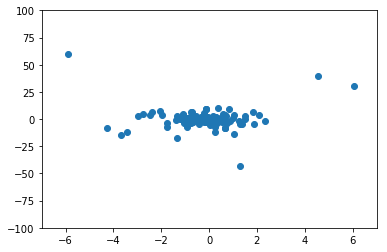

In [72]:
import matplotlib.pyplot as plt
plt.scatter(principalDf.loc[:,'principal component 1'],principalDf.loc[:,'principal component 2'])
plt.axis([-7.0,7.0, -100, 100])
plt.show()